<a href="https://colab.research.google.com/github/Chandana-756/NeuroNexus_DataScience/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/tested.csv', encoding='latin1')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df = pd.DataFrame(data)
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
df.notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,False,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,True,True,True,True,True,False,True,True,True,True,False,True
414,True,True,True,True,True,True,True,True,True,True,True,True
415,True,True,True,True,True,True,True,True,True,True,False,True
416,True,True,True,True,True,False,True,True,True,True,False,True


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.shape

(418, 12)

In [ ]:
#Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
# Fill missing "Cabin" values based on passenger class
class_cabin_mapping = df.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))
# Update the "Cabin" column with the imputed values
df['Cabin'] = class_cabin_mapping

In [ ]:
df['Cabin_Deck'] = df['Cabin'].str[0]
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df.drop(columns=['Cabin'], inplace = True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Deck,Has_Cabin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,F,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,F,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,F,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,F,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,F,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
 11  Cabin_Deck   418 non-null    object 
 12  Has_Cabin    418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Cabin_Deck     0
Has_Cabin      0
dtype: int64

In [ ]:
df.dropna(subset = ['Fare'], inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_Deck     0
Has_Cabin      0
dtype: int64

Visualization

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

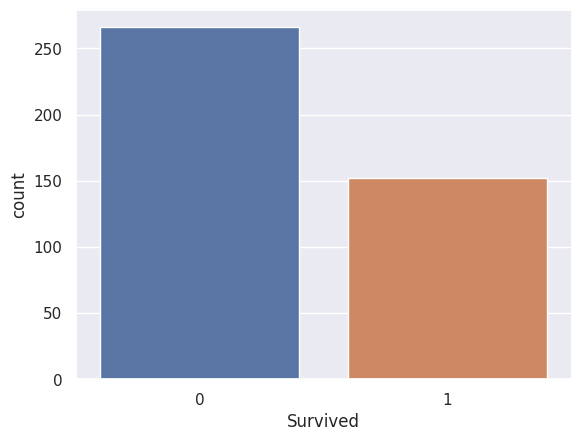

In [ ]:
#making a count plot
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Sex', ylabel='count'>

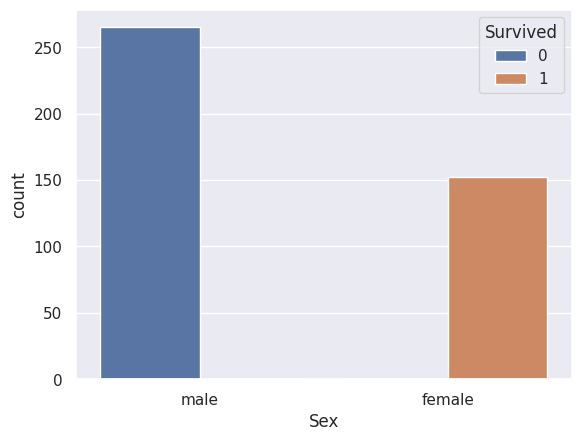

In [ ]:
#making a countplot for number of survivors gender wise
sns.countplot(x='Sex',hue='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

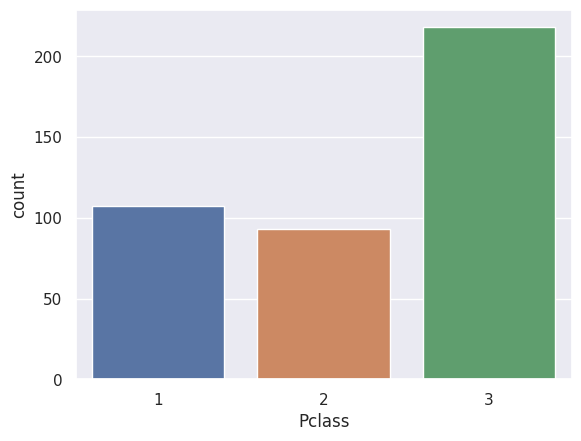

In [ ]:
#making a countplot for "Pclass" column
sns.countplot(x='Pclass',data=data)

In [ ]:
gender=pd.get_dummies(df['Sex'],drop_first=True)

In [ ]:
df['Gender']=gender

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Cabin_Deck', 'Has_Cabin',
       'Gender'],
      dtype='object')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Deck,Has_Cabin,Gender
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,F,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,F,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,F,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,F,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,F,1,0


In [ ]:
df.drop(['Name','Sex','Embarked','Cabin_Deck'],axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Has_Cabin,Gender
0,892,0,3,34.5,0,0,330911,7.8292,1,1
1,893,1,3,47.0,1,0,363272,7.0000,1,0
2,894,0,2,62.0,0,0,240276,9.6875,1,1
3,895,0,3,27.0,0,0,315154,8.6625,1,1
4,896,1,3,22.0,1,1,3101298,12.2875,1,0


Training the data

In [ ]:
x = df[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Has_Cabin','Gender']]
y = df[['Survived']]

In [ ]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Gender
0,892,3,34.5,0,0,7.8292,1,1
1,893,3,47.0,1,0,7.0000,1,0
2,894,2,62.0,0,0,9.6875,1,1
3,895,3,27.0,0,0,8.6625,1,1
4,896,3,22.0,1,1,12.2875,1,0
...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,1,1
414,1306,1,39.0,0,0,108.9000,1,0
415,1307,3,38.5,0,0,7.2500,1,1
416,1308,3,27.0,0,0,8.0500,1,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict = LR.predict(X_test)

Testing

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pd.DataFrame(confusion_matrix(Y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,50,0
Actual Yes,0,34


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

